## Predicting Box Office Revenue with TMDB Dataset

In [3]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import ast 
from sklearn.ensemble import RandomForestRegressor # ML
from sklearn.inspection import permutation_importance # computing feature importance
from sklearn import preprocessing

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
submission = pd.read_csv("sample_submission.csv")
train.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,...,8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,...,10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000
3,4,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,...,3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000
4,5,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,...,2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970


## Data Manipulation

In [4]:
# The release date for the movie "Jails, Hospitals & Hip-Hop" is missing. 
test[test["release_date"].isnull()]

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew
828,3829,NaN,0,"[{'id': 18, 'name': 'Drama'}]",NaN,tt0210130,en,"Jails, Hospitals & Hip-Hop","Jails, Hospitals &amp; Hip-Hop is a cinematic ...",0.009057,...,NaN,NaN,90.0,NaN,NaN,three worlds / two million voices / one genera...,"Jails, Hospitals & Hip-Hop",NaN,[],NaN


#### #Based on Imdb, the release date for the "Jails, Hospitals & Hip-Hop" move is May 2020

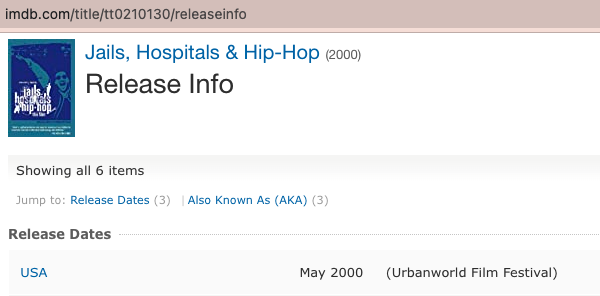

In [5]:
# Addin the release date 05/01/2020
test.loc[test['release_date'].isnull()==True, 'release_date']= '5/1/00'
test[test["release_date"]== '5/1/00']

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew
828,3829,NaN,0,"[{'id': 18, 'name': 'Drama'}]",NaN,tt0210130,en,"Jails, Hospitals & Hip-Hop","Jails, Hospitals &amp; Hip-Hop is a cinematic ...",0.009057,...,NaN,5/1/00,90.0,NaN,NaN,three worlds / two million voices / one genera...,"Jails, Hospitals & Hip-Hop",NaN,[],NaN
1731,4732,NaN,103000000,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",NaN,tt0172495,en,Gladiator,"In the year 180, the death of emperor Marcus A...",23.186667,...,"[{'iso_3166_1': 'GB', 'name': 'United Kingdom'...",5/1/00,155.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A Hero Will Rise.,Gladiator,"[{'id': 588, 'name': 'rome'}, {'id': 1394, 'na...","[{'cast_id': 8, 'character': 'Maximus', 'credi...","[{'credit_id': '52fe4217c3a36847f800340d', 'de..."


In [6]:
# Converting the format of the date
train['release_date'] = pd.to_datetime(train['release_date'], format='%m/%d/%y')
test['release_date'] = pd.to_datetime(test['release_date'], format='%m/%d/%y')

In [7]:
train["release_year"] = pd.to_datetime(train["release_date"]).dt.year.astype(int)
train["release_day"] = pd.to_datetime(train["release_date"]).dt.dayofweek.astype(int)
train["release_month"] = pd.to_datetime(train["release_date"]).dt.month.astype(int)
test["release_year"] = pd.to_datetime(test["release_date"]).dt.year.astype(int)
test["release_day"] = pd.to_datetime(test["release_date"]).dt.dayofweek.astype(int)
test["release_month"] = pd.to_datetime(test["release_date"]).dt.month.astype(int)

In [8]:
# Since this competition was in 2019, there shouldn't be a release that after 2019
train['release_year'].max()

2068

In [9]:
# Fixing the dates
def fix_date(x):
    if x > 2019:
        return x - 100
    else:
        return x 

In [10]:
train['release_year'] = train['release_year'].apply(lambda x: fix_date(x))
test['release_year'] = test['release_year'].apply(lambda x: fix_date(x))

In [11]:
# Replacing missing values with none:
train['genres'] = train['genres'].fillna("none")
train['original_language'] = train['original_language'].fillna("none")
train['spoken_languages'] = train['spoken_languages'].fillna("none")
train['status'] = train['status'].fillna("none")
train['production_countries'] = train['production_countries'].fillna("none")
train['production_companies'] = train['production_companies'].fillna("none")

test['genres'] = test['genres'].fillna("none")
test['original_language'] = test['original_language'].fillna("none")
test['spoken_languages'] = test['spoken_languages'].fillna("none")
test['status'] = test['status'].fillna("none")
test['production_countries'] = test['production_countries'].fillna("none")
test['production_companies'] = test['production_companies'].fillna("none")

In [12]:
for e in enumerate(train['genres'][:10]):
    print(e)

(0, "[{'id': 35, 'name': 'Comedy'}]")
(1, "[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'name': 'Drama'}, {'id': 10751, 'name': 'Family'}, {'id': 10749, 'name': 'Romance'}]")
(2, "[{'id': 18, 'name': 'Drama'}]")
(3, "[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'name': 'Drama'}]")
(4, "[{'id': 28, 'name': 'Action'}, {'id': 53, 'name': 'Thriller'}]")
(5, "[{'id': 16, 'name': 'Animation'}, {'id': 12, 'name': 'Adventure'}, {'id': 10751, 'name': 'Family'}]")
(6, "[{'id': 27, 'name': 'Horror'}, {'id': 53, 'name': 'Thriller'}]")
(7, "[{'id': 99, 'name': 'Documentary'}]")
(8, "[{'id': 28, 'name': 'Action'}, {'id': 35, 'name': 'Comedy'}, {'id': 10402, 'name': 'Music'}, {'id': 10751, 'name': 'Family'}, {'id': 12, 'name': 'Adventure'}]")
(9, "[{'id': 35, 'name': 'Comedy'}, {'id': 10402, 'name': 'Music'}]")


In [13]:
# Simple encoding 

def get_dictionary(s):
    try:
        d = eval(s)
    except:
        d = {}
    return d

In [14]:
train.genres = train.genres.map(lambda x: sorted([d['id'] for d in get_dictionary(x)])).map(lambda x: ','.join(map(str, x)))
train.spoken_languages = train.spoken_languages.map(lambda x: sorted([d['iso_639_1'] for d in get_dictionary(x)])).map(lambda x: ','.join(map(str, x)))
train.production_companies = train.production_companies.map(lambda x: sorted([d['id'] for d in get_dictionary(x)])).map(lambda x: ','.join(map(str, x)))
train.production_countries = train.production_countries.map(lambda x: sorted([d['iso_3166_1'] for d in get_dictionary(x)])).map(lambda x: ','.join(map(str, x)))
train.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,status,tagline,title,Keywords,cast,crew,revenue,release_year,release_day,release_month
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,35,NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651,2015,4,2
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"18,35,10749,10751",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,...,Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435,2004,4,8
2,3,NaN,3300000,18,http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,...,Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000,2014,4,10
3,4,NaN,1200000,"18,53",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,...,Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000,2012,4,3
4,5,NaN,0,"28,53",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,...,Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970,2009,3,2


In [15]:
test.genres = test.genres.map(lambda x: sorted([d['id'] for d in get_dictionary(x)])).map(lambda x: ','.join(map(str, x)))
test.spoken_languages = test.spoken_languages.map(lambda x: sorted([d['iso_639_1'] for d in get_dictionary(x)])).map(lambda x: ','.join(map(str, x)))
test.production_companies = test.production_companies.map(lambda x: sorted([d['id'] for d in get_dictionary(x)])).map(lambda x: ','.join(map(str, x)))
test.production_countries = test.production_countries.map(lambda x: sorted([d['iso_3166_1'] for d in get_dictionary(x)])).map(lambda x: ','.join(map(str, x)))


In [16]:
for c in ['genres', 'production_companies', 'production_countries', 'spoken_languages']:
    lbl = preprocessing.LabelEncoder()
    lbl.fit(list(train[c].fillna('').astype(str)) + list(test[c].fillna('').astype(str)))
    train[c] = lbl.transform(train[c].fillna(''))
    test[c] = lbl.transform(test[c].fillna(''))
    print(c, len(lbl.classes_))

genres 816
production_companies 5545
production_countries 539
spoken_languages 609


In [17]:
# Simple encoding
train['status'] = train['status'].astype('category')
train['status'] = train['status'].cat.codes
test['status'] = test['status'].astype('category')
test['status'] = test['status'].cat.codes

train['original_language'] = train['original_language'].astype('category')
train['original_language'] = train['original_language'].cat.codes
test['original_language'] = test['original_language'].astype('category')
test['original_language'] = test['original_language'].cat.codes

# Replacing 0 Budget values with the median value
train['budget']= train['budget'].replace(0, train['budget'].median())
test['budget']= test['budget'].replace(0, test['budget'].median())

## Exploratory Data Analysis

In [18]:
# fig, ax = plt.subplots(3, 1, tight_layout=True)
# plt.grid()

# train.groupby('release_year')['revenue'].mean().plot(ax=ax[0], figsize=(10, 10), linewidth=3).set_title('Revenue Based on Release Year', fontweight="bold")
# ax[0].grid()

# train.groupby('release_day')['revenue'].mean().plot(ax=ax[1], figsize=(10, 10), linewidth=3).set_title('Revenue Based on Release Day', fontweight="bold")
# ax[1].grid()

# train.groupby('release_month')['revenue'].mean().plot(ax=ax[2], figsize=(10, 10), linewidth=3).set_title('Revenue Based on Release Month', fontweight="bold")
# ax[2].grid()


# fig.tight_layout(pad=2.0)
# plt.show()

In [19]:
# fig, ax = plt.subplots(2, 2, figsize=(10, 10), tight_layout=True)

# train.plot(ax=ax[0][0], x='budget', y='revenue', style='o', ylabel= 'revenue', color='green').set_title('Revenue & Budget', fontweight="bold")
# ax[0][0].grid()

# train.plot(ax=ax[1][0], x='popularity', y='revenue', style='o', ylabel= 'revenue').set_title('Revenue & Popularity', fontweight="bold")
# ax[1][0].grid()

# train.plot(ax=ax[0][1], x='budget', y='popularity', style='o', ylabel= 'popularity', color='slateblue').set_title('Popularity & Budget', fontweight="bold")
# ax[0][1].grid()

# train.plot(ax=ax[1][1], x='release_year', y='popularity', style='o', ylabel= 'popularity', color='salmon').set_title('Popularity & Release Year', fontweight="bold")
# ax[1][1].grid()

In [20]:
# fig, ax = plt.subplots(1, 2, figsize=(12, 5), tight_layout=True)

# train.hist(ax=ax[0], column='revenue', bins=25, grid=False, figsize=(8,5), color='green', zorder=2, rwidth=0.9)
# ax[0].grid()

# train.hist(ax=ax[1], column='release_year', bins=25, grid=False, figsize=(8,5), color='blue', zorder=2, rwidth=0.9)
# ax[1].grid()



In [21]:
# fig, ax = plt.subplots(1, 2, figsize=(12, 5), tight_layout=True)

# train.hist(ax=ax[0], column='budget', bins=25, grid=False, figsize=(8,5), color='orange', zorder=2, rwidth=0.9)
# ax[0].grid()

# train.hist(ax=ax[1], column='popularity', bins=25, grid=False, figsize=(8,5), color='brown', zorder=2, rwidth=0.9)
# ax[1].grid()

In [22]:
# fig, ax = plt.subplots(1, 2, figsize=(12, 5), tight_layout=True)

# train.boxplot(ax=ax[0], column=['revenue', 'budget']).set_title('Boxplots of Revenue and Budget', fontweight="bold") 
# train.boxplot(ax=ax[1], column=['popularity']).set_title('Boxplot of Popularity', fontweight="bold") 

## Random Forest Model

In [23]:
# Creating the list of features
feature_names = ['release_year', 'release_day', 'release_month', 'status', 'original_language',
                 'budget', 'popularity', 'genres', 'production_companies', 'production_countries',
                'spoken_languages']

# Assigning the data corresponding to features in feature_names
X_train = train[feature_names]

X_train.head()

,release_year,release_day,release_month,status,original_language,budget,popularity,genres,production_companies,production_countries,spoken_languages
0,2015,4,2,0,7,14000000,6.575393,729,3183,536,305
1,2004,4,8,0,7,40000000,8.248895,526,1225,536,305
2,2014,4,10,0,7,3300000,64.299990,431,1481,536,305
3,2012,4,3,0,13,1200000,3.174936,583,0,467,420
4,2009,3,2,0,18,8000000,1.148070,705,0,485,583


In [24]:
X_test = test[feature_names]
X_test.head()

,release_year,release_day,release_month,status,original_language,budget,popularity,genres,production_companies,production_countries,spoken_languages
0,2007,5,7,1,19,7450000,3.851534,22,0,483,451
1,1958,6,5,1,9,88000,3.559789,667,5457,536,305
2,1997,4,5,1,9,7450000,8.085194,736,4427,536,305
3,2010,5,9,1,12,6800000,8.596012,618,2339,146,46
4,2005,4,2,1,9,2000000,3.217680,775,0,536,305


In [25]:
# Assigning the data corresponding to the target variable

y_train = train['revenue']
# y_test = test['revenue']
# print(y_test)

In [26]:
# Defining the model 
rf_model = RandomForestRegressor(random_state=1)

# Fitting the model 
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=1)

In [28]:
# Prediction
from sklearn.metrics import accuracy_score
y_pred = rf_model.predict(X_test)
pred = pd.DataFrame(y_pred)

release_year = int(input("Enter the release year: "))
release_day = int(input("Enter the release day: "))
release_month = int(input("Enter the release month: "))
status = int(input("Enter the status: "))
original_language = int(input("Enter the original language: "))
budget = int(input("Enter the budget: "))
popularity = float(input("Enter the popularity: "))
genres = int(input("Enter the genere: "))
production_companies = int(input("Enter the production_companies: "))
production_countries = int(input("Enter the production_countries: "))
spoken_languages = int(input("Enter the spoken_languages: "))
result = rf_model.predict([[release_year, release_day, release_month, status, original_language,
                 budget, popularity, genres, production_companies, production_countries,
                spoken_languages]])
print(result.astype('int64'))
# print(accuracy_score(y_train,y_pred))

In [ ]:
# Calculating feature importance

feat_importances = pd.Series(rf_model.feature_importances_, index=X_train.columns)
feat_importances.nlargest(10).plot(kind='barh')

In [ ]:
# print 
datasets = pd.concat([submission['id'], pred], axis=1)
datasets.columns =['id', 'revenue']
datasets.to_csv('submission.csv', index=False)
print(datasets)